In [700]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sympy
from scipy import optimize
from IPython.display import Markdown, display
from mpl_toolkits.mplot3d import Axes3D

In [701]:
## Question 2.1

Objective: $S(p) = Np(1-p)^{N-1}$<br/>
Decision variable(s):  $p$<br/>
$\nabla S(p) = N(1-p)^{N-1} - N(N-1)p(1-p)^{N-2}$<br/>
$\nabla^2 S(p) = \left(N-2\right)\left(N-1\right)N\left(1-p\right)^{N-3}p-2\left(N-1\right)N\left(1-p\right)^{N-2}$<br/>

$N=1$, $S(p) = p$, either convex or concave.<br/>
$N=2$, $S(p) = 2p(1-p)$, concave.<br/>
$N \ge 3$, $\nabla^2 S(p) = (N-1)N(1-p)^{N-3}(Np-2)$;<br/>
when $1 < p < \frac{2}{N}$, $\nabla^2 S(p) <0$; when $\frac{2}{N} < p < 1$, $\nabla^2 S(p) >0$, neither convex nor concave.<br/>

<Figure size 720x720 with 0 Axes>

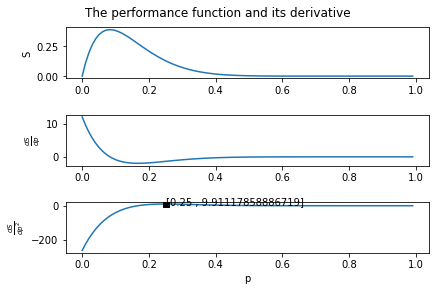

In [702]:
## Question 2.2 (N=12)
# Define function y
N = 12
p = sympy.Symbol('p')
S = N*p*(1-p)**(N-1)
Sdp = S.diff(p)
Sdp2 = Sdp.diff(p)

# define p and S
p_value = []
S_value = []
Sdp_value = []
Sdp2_value = []

for i in np.arange(0,1,0.01):
    p_value.append(i)
    S_value.append(S.subs('p',i))
    Sdp_value.append(Sdp.subs('p',i))
    Sdp2_value.append(Sdp2.subs('p',i))
    max_Sdp2_index=np.argmax(Sdp2_value)


# Plot the first derivative of the function
plt.figure(figsize=(10, 10))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.suptitle('The performance function and its derivative', fontsize=12)
ax1.plot(p_value, S_value)
ax1.set(xlabel=" ", ylabel="S")

ax2.plot(p_value, Sdp_value)
ax2.set(xlabel=" ", ylabel=r'$\frac{dS}{dp}$')

ax3.plot(p_value, Sdp2_value)
ax3.plot(p_value[max_Sdp2_index],Sdp2_value[max_Sdp2_index],'ks')
show_max='['+str(p_value[max_Sdp2_index])+' , '+str(Sdp2_value[max_Sdp2_index])+']'
plt.annotate(show_max,xytext=(p_value[max_Sdp2_index],Sdp2_value[max_Sdp2_index]),xy=(p_value[max_Sdp2_index],Sdp2_value[max_Sdp2_index]))
ax3.set(xlabel="p", ylabel=r'$\frac{dS}{dp^2}$')

fig.tight_layout(pad=0.5, w_pad=0.5, h_pad=0)
#fig.subplots_adjust(top=0.8)

plt.show()


$N = 12$, $\nabla^2 S(0) < 0$; $\nabla^2 S(0.25) > 0$<br/>
The function is neither convex nor concave.

In [703]:
## Question 2.3
# Define function S(p)
def S(p):
    N = 12
    return -N*p*(1-p)**(N-1)


# Optimisation
res = optimize.minimize_scalar(S, bounds=(-1, 1), method='bounded')

# Display results
x = res.x
y = -S(x)

display(Markdown(r"$p_{max} = %f$"%(x)))
display(Markdown(r"$S(p)_{max} = %f$"%(y)))

$p_{max} = 0.083335$

$S(p)_{max} = 0.383995$

$N=12$, $\nabla S(p) = 12(1-p)^{10}(1-12p)$; $\nabla^2 S(p) = 110(1-p)^{9}(12p-2)$<br/>
$p=\frac{1}{12}$, $\nabla S(p) = 0$; $\nabla^2 S(p)> 0$<br/>
$S(p)_{max} = S(\frac{1}{12}) = 0.3840$

1. Q positive definite

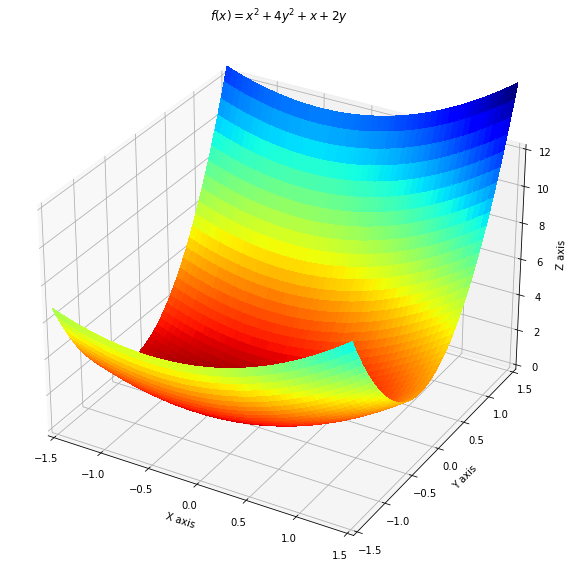

1. Q negative definite

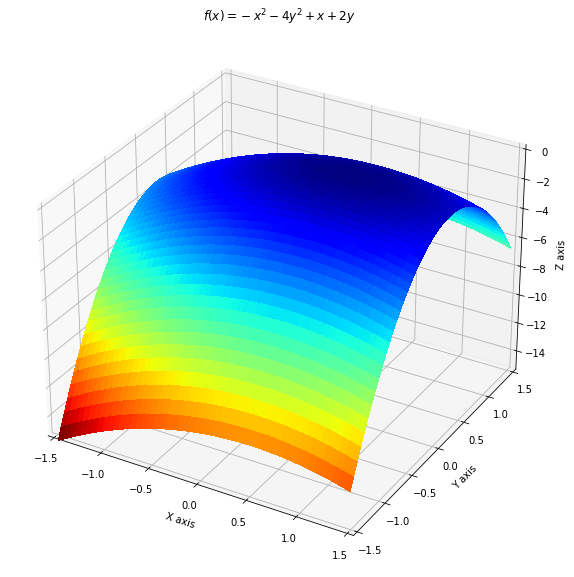

2. Maximum number of iterations is 1001

normal step size 0.1:

$x_{min} = [-0.496311 -0.250000]$

$f_{min} = -0.499986$

iterations = 22

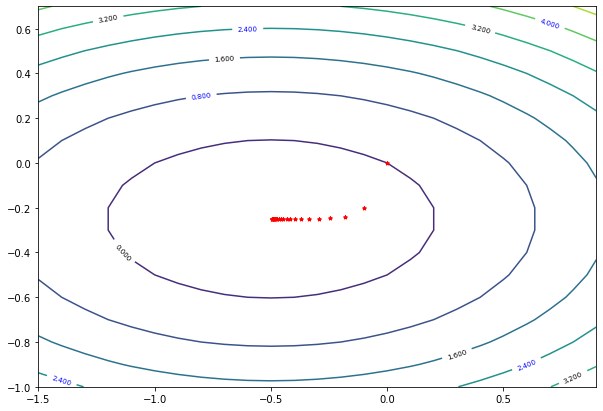

large step size 0.3:

$x_{min} = [-0.500000 -47000634685778568267316121981579162158027484869755707821986230636410595148133623816117517743470742766847136584780984036316277421368373995485790208.000000]$

$f_{min} = 8836238643464045515833250957865978042504147742082584598275713759519143596126758683913013164899377890395041590510227671862930733741330022588519660595698913567142529878859544068038028086925264649209740084243141881085469112616237214490851293084081700069824043691886052847251304649743930885144576.000000$

iterations = 1001

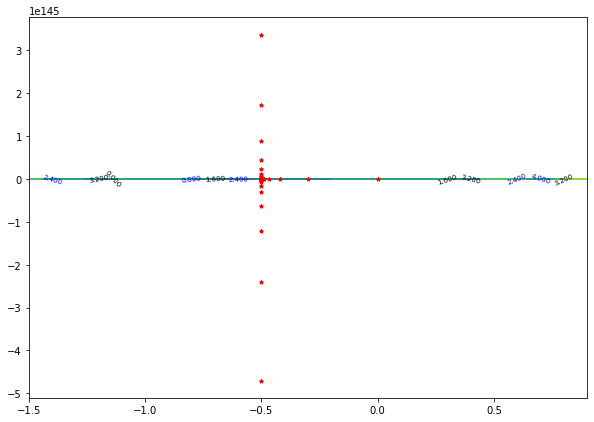

small step size 0.0001:

$x_{min} = [-0.090725 -0.137794]$

$f_{min} = -0.282133$

iterations = 1001

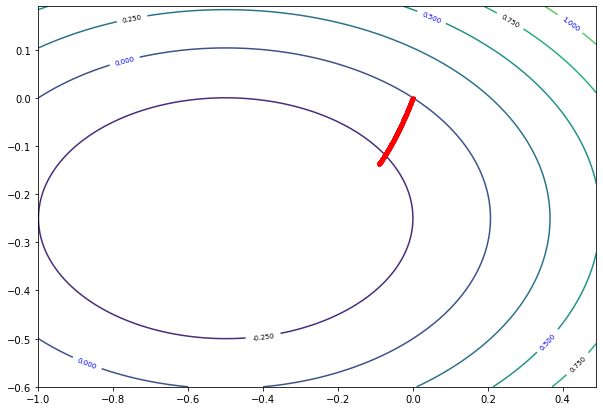

3. Maximum number of iterations is 1001

small condition number 2:

$x_{min} = [-1.750002 -2.503627]$

$f_{min} = -12.374987$

iterations = 27

bias = 0.000007

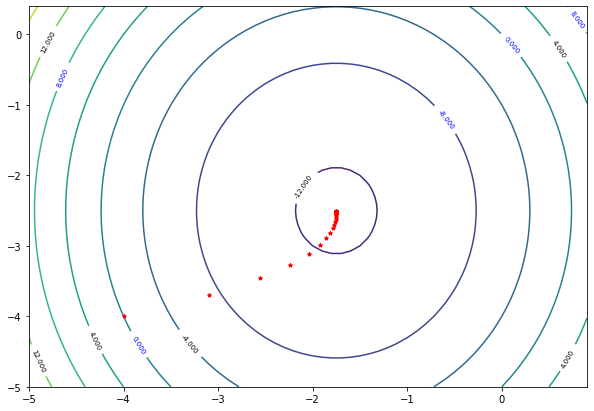

large condition number 5:

$x_{min} = [-3.503689 -0.500000]$

$f_{min} = -13.499986$

iterations = 22

bias = 0.000008

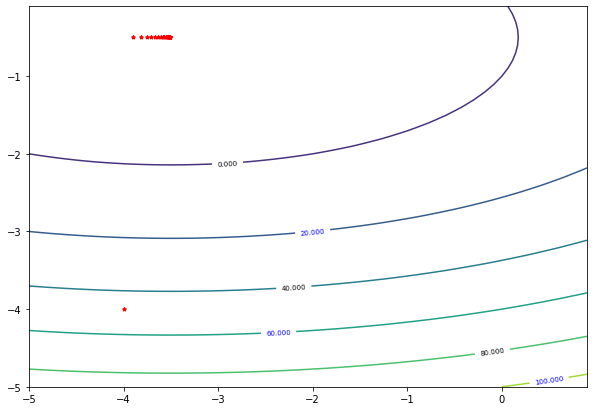

4. (b) Diminish step size

Maximum number of iterations is 1001

$x_{min} = [-0.489714 -0.250011]$

$f_{min} = -0.499894$

iterations = 19

bias = 0.000008

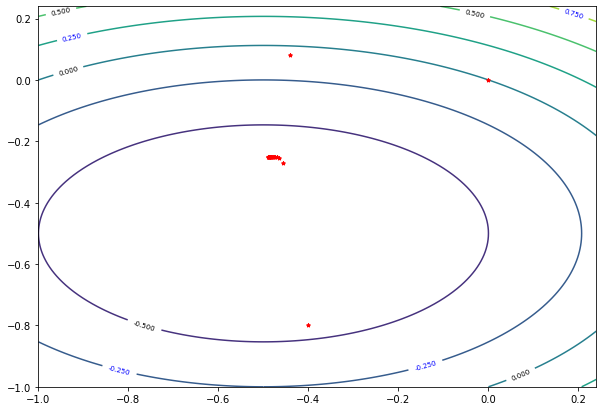

4. (c) Simple line search (Armijo)

$x_{min} = [-0.499998 -0.250001]$

$f_{min} = -0.500000$

iterations = 23

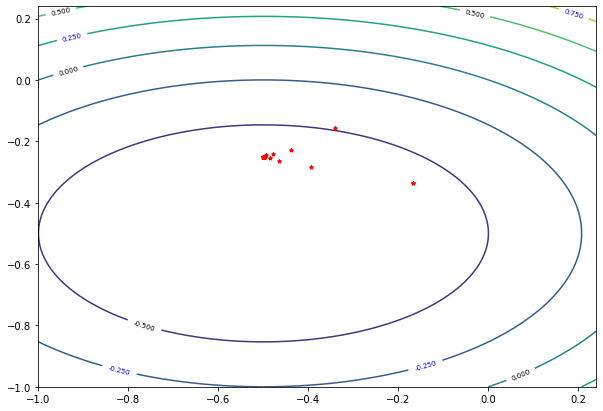

5. (b) Diminish step size

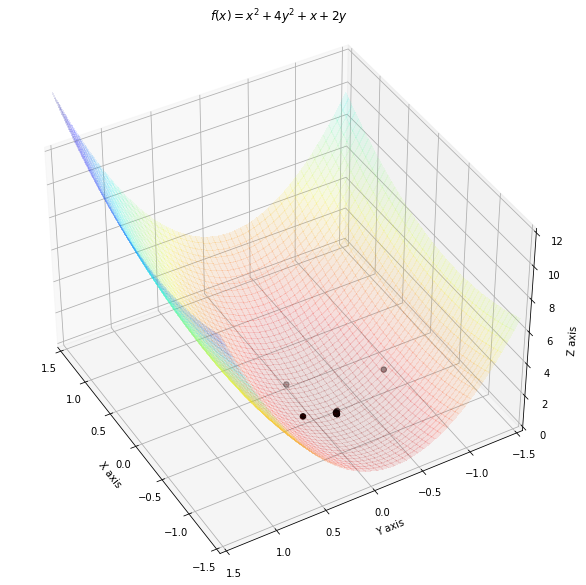

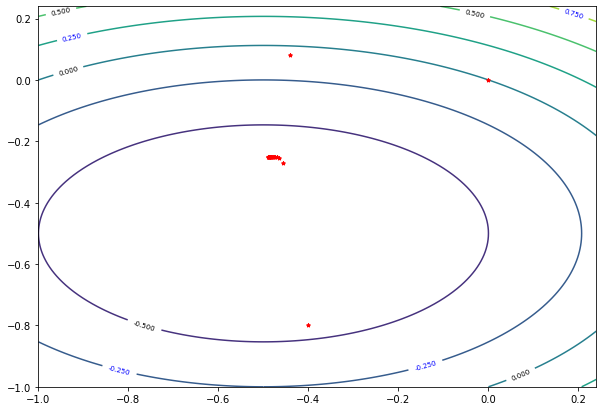

5. (c) Simple line search

$x_{min} = [-0.499998 -0.250001]$

$f_{min} = -0.500000$

iterations = 23

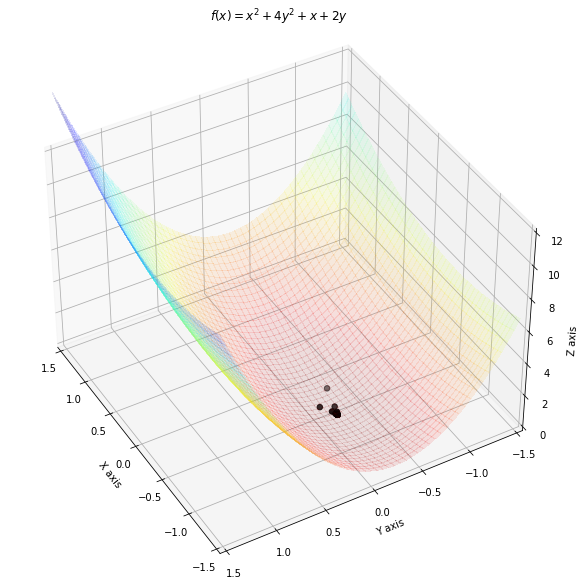

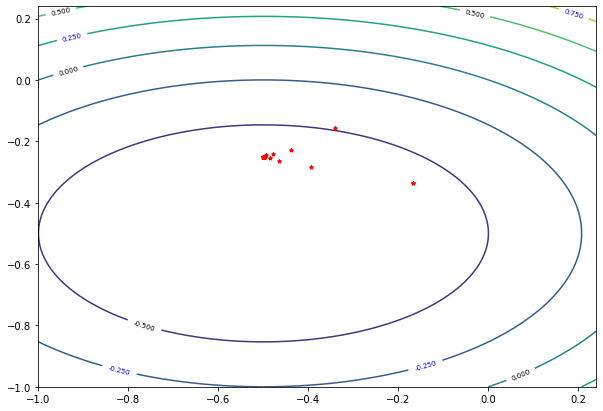

In [704]:
### Question 2.4
## Question 2.4.1 (Q positive definite)
display(Markdown(r"1. Q positive definite"))
# Define function f(x)
f = lambda x,y: x**2 + 4*y**2 + x + 2*y

# Initialize figure
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

# Evaluate function
X = np.arange(-1.5, 1.5, 0.01)
Y = np.arange(-1.5, 1.5, 0.01)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet_r,
                       linewidth=0, antialiased=False)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('$f(x) = x^2+4y^2+x+2y$')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(0, 12)
plt.show()

## Question 2.4.1 (Q negative definite)
# Define function f(x)
display(Markdown(r"1. Q negative definite"))
f = lambda x,y: -x**2 - 4*y**2 + x + 2*y

# Initialize figure
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

# Evaluate function
X = np.arange(-1.5, 1.5, 0.01)
Y = np.arange(-1.5, 1.5, 0.01)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet_r,
                       linewidth=0, antialiased=False)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('$f(x) = -x^2-4y^2+x+2y$')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-15, 0)
plt.show()

## Question 2.4.2 (Large & small step size)
# Define Q and r
Q = np.array([[1,0],[0,4]])
dQ = np.array([[2,0],[0,8]])
r = np.array([1,2])

# Define my own gradient algorithm
def gradient_descent(x0,obj_func,grad_func,iter_max,threshold,alpha,const_step):
#(initial value of x, object function, gradient of the objective, the maximum number of iterations,
# the stop threshold, alpha, 0 if step is constant)
    x = x0
    f_prev = obj_func(x) # previous value of objective function
    f_curr = f_prev # current value of objective function
    x_history = x # history of all x
    f_history = obj_func(x) # history of all f
    i = 0
    bias = 1e12

    while  i < iter_max and bias > threshold:
        x = x -(1/(i+1))**const_step*alpha*grad_func(x) # gradient descent
        f_curr = obj_func(x)

        # store the history of x and f
        x_history = np.vstack((x_history,x))
        f_history = np.vstack((f_history,obj_func(x)))

        # update iteration number and bias between successive values of objective function
        i += 1
        bias = np.absolute(f_curr-f_prev)
        f_prev = f_curr

    return x,obj_func(x),i,bias,x_history,f_history

# Define objective function
def f(x):
    return np.sum(np.dot(x,Q)*x + x*r)

def df(x):
    return np.dot(dQ,x) + r


# Optimisation (normal step size)
display(Markdown(r"2. Maximum number of iterations is 1001"))
display(Markdown(r"normal step size 0.1:"))
x0 = np.array([0,0])
resNSS = gradient_descent(x0,f,df,1001,1.0e-5,0.1,0)
x_value = resNSS[0]
f_value = resNSS[1]
iter = resNSS[2]
x_history = resNSS[4]
f_history = resNSS[5]
x1_history  = x_history[:,0]
x2_history  = x_history[:,1]

display(Markdown(r"$x_{min} = [%f %f]$"%(x_value[0],x_value[1])))
display(Markdown(r"$f_{min} = %f$"%(f_value)))
display(Markdown(r"iterations = %d"%(iter)))

# Draw the contour
x1 = np.arange(-1.5,1,0.1)
x2 = np.arange(-1,0.75,0.1)
def fc(x,y):
    return x**2 + 4*y**2 + x + 2*y
xv1,xv2 = np.meshgrid(x1,x2)

plt.figure(figsize=(10,7))
contour = plt.contour(xv1,xv2,fc(xv1,xv2))
plt.clabel(contour,fontsize=7,colors=('b','k'))
plt.plot(x1_history,x2_history,'r*',markersize=4)
plt.show()

# Optimisation (large step size)
display(Markdown(r"large step size 0.3:"))
x0 = np.array([0,0])
resLSS = gradient_descent(x0,f,df,1001,1.0e-5,0.3,0)
x_value = resLSS[0]
f_value = resLSS[1]
iter = resLSS[2]
x_history = resLSS[4]
f_history = resLSS[5]
x1_history  = x_history[:,0]
x2_history  = x_history[:,1]

display(Markdown(r"$x_{min} = [%f %f]$"%(x_value[0],x_value[1])))
display(Markdown(r"$f_{min} = %f$"%(f_value)))
display(Markdown(r"iterations = %d"%(iter)))

# Draw the contour
x1 = np.arange(-1.5,1,0.1)
x2 = np.arange(-1,0.75,0.1)
def fc(x,y):
    return x**2 + 4*y**2 + x + 2*y
xv1,xv2 = np.meshgrid(x1,x2)

plt.figure(figsize=(10,7))
contour = plt.contour(xv1,xv2,fc(xv1,xv2))
plt.clabel(contour,fontsize=7,colors=('b','k'))
plt.plot(x1_history,x2_history,'r*',markersize=4)
plt.show()

# Optimisation (small step size)
display(Markdown(r"small step size 0.0001:"))
x0 = np.array([0,0])
resSSS = gradient_descent(x0,f,df,1001,1.0e-5,0.0001,0)
x_value = resSSS[0]
f_value = resSSS[1]
iter = resSSS[2]
x_history = resSSS[4]
f_history = resSSS[5]
x1_history  = x_history[:,0]
x2_history  = x_history[:,1]

display(Markdown(r"$x_{min} = [%f %f]$"%(x_value[0],x_value[1])))
display(Markdown(r"$f_{min} = %f$"%(f_value)))
display(Markdown(r"iterations = %d"%(iter)))

# Draw the contour
x1 = np.arange(-1,0.5,0.01)
x2 = np.arange(-0.6,0.2,0.01)
def fc(x,y):
    return x**2 + 4*y**2 + x + 2*y
xv1,xv2 = np.meshgrid(x1,x2)

plt.figure(figsize=(10,7))
contour = plt.contour(xv1,xv2,fc(xv1,xv2))
plt.clabel(contour,fontsize=7,colors=('b','k'))
plt.plot(x1_history,x2_history,'r*',markersize=4)
plt.show()

## Question 2.4.3 (Large & small condition number)
# Define Q and r
QLcn= np.array([[1,0],[0,5]])
dQLcn = np.array([[2,0],[0,10]])
QScn= np.array([[2,0],[0,1]])
dQScn = np.array([[4,0],[0,2]])
r = np.array([7,5])

# Define objective function
def fLcn(x):
    return np.sum(np.dot(x,QLcn)*x + x*r)

def dfLcn(x):
    return np.dot(dQLcn,x) + r

def fScn(x):
    return np.sum(np.dot(x,QScn)*x + x*r)

def dfScn(x):
    return np.dot(dQScn,x) + r

# Optimisation (small condition number)
display(Markdown(r"3. Maximum number of iterations is 1001"))
display(Markdown(r"small condition number 2:"))
x0 = np.array([-4,-4])
resSCN = gradient_descent(x0,fScn,dfScn,1001,1.0e-5,0.1,0)
x_value = resSCN[0]
f_value = resSCN[1]
iter = resSCN[2]
bias_value = resSCN[3]
x_history = resSCN[4]
f_history = resSCN[5]
x1_history  = x_history[:,0]
x2_history  = x_history[:,1]

display(Markdown(r"$x_{min} = [%f %f]$"%(x_value[0],x_value[1])))
display(Markdown(r"$f_{min} = %f$"%(f_value)))
display(Markdown(r"iterations = %d"%(iter)))
display(Markdown(r"bias = %f"%(bias_value)))

# Draw the contour
x1 = np.arange(-5,1,0.1)
x2 = np.arange(-5,0.5,0.1)
def fscn(x,y):
    return 2*x**2 + y**2 + 7*x + 5*y
xv1,xv2 = np.meshgrid(x1,x2)

plt.figure(figsize=(10,7))
contour = plt.contour(xv1,xv2,fscn(xv1,xv2))
plt.clabel(contour,fontsize=7,colors=('b','k'))
plt.plot(x1_history,x2_history,'r*',markersize=4)
plt.show()

# Optimisation (large condition number)
display(Markdown(r"large condition number 5:"))
x0 = np.array([-4,-4])
resLSC = gradient_descent(x0,fLcn,dfLcn,1001,1.0e-5,0.1,0)
x_value = resLSC[0]
f_value = resLSC[1]
iter = resLSC[2]
bias_value = resLSC[3]
x_history = resLSC[4]
f_history = resLSC[5]
x1_history  = x_history[:,0]
x2_history  = x_history[:,1]

display(Markdown(r"$x_{min} = [%f %f]$"%(x_value[0],x_value[1])))
display(Markdown(r"$f_{min} = %f$"%(f_value)))
display(Markdown(r"iterations = %d"%(iter)))
display(Markdown(r"bias = %f"%(bias_value)))

# Draw the contour
x1 = np.arange(-5,1,0.1)
x2 = np.arange(-5,0,0.1)
def fscn(x,y):
    return x**2 + 5*y**2 + 7*x + 5*y
xv1,xv2 = np.meshgrid(x1,x2)

plt.figure(figsize=(10,7))
contour = plt.contour(xv1,xv2,fscn(xv1,xv2))
plt.clabel(contour,fontsize=7,colors=('b','k'))
plt.plot(x1_history,x2_history,'r*',markersize=4)
plt.show()

## Question 2.4.4 (Diminish step size)
# Define Q and r
Q = np.array([[1,0],[0,4]])
dQ = np.array([[2,0],[0,8]])
r = np.array([1,2])

# Define objective function
def fDSS(x):
    return np.sum(np.dot(x,Q)*x + x*r)

def dfDSS(x):
    return np.dot(dQ,x) + r


# Optimisation (Diminish step size)
display(Markdown(r"4. (b) Diminish step size"))
display(Markdown(r"Maximum number of iterations is 1001"))

x0 = np.array([0,0])
resDSS = gradient_descent(x0,fDSS,dfDSS,1001,1.0e-5,0.4,1)
x_value = resDSS[0]
f_value = resDSS[1]
iter = resDSS[2]
x_history = resDSS[4]
f_history = resDSS[5]
x1_history  = x_history[:,0]
x2_history  = x_history[:,1]

display(Markdown(r"$x_{min} = [%f %f]$"%(x_value[0],x_value[1])))
display(Markdown(r"$f_{min} = %f$"%(f_value)))
display(Markdown(r"iterations = %d"%(iter)))
display(Markdown(r"bias = %f"%(bias_value)))

# Draw the contour
x1 = np.arange(-1,0.25,0.01)
x2 = np.arange(-1,0.25,0.01)
def fscn(x,y):
    return x**2 + 2*y**2 + 1*x + 2*y
xv1,xv2 = np.meshgrid(x1,x2)

plt.figure(figsize=(10,7))
contour = plt.contour(xv1,xv2,fscn(xv1,xv2))
plt.clabel(contour,fontsize=7,colors=('b','k'))
plt.plot(x1_history,x2_history,'r*',markersize=4)
plt.show()

## Question 2.4.4 (Simple line search)
# Define Q and r
Q = np.array([[1,0],[0,4]])
dQ = np.array([[2,0],[0,8]])
r = np.array([1,2])

# Define simple line search (Armijo)
def line_search(x0, obj_fun, grad_fun, threshold):
    x = x0
    x_his = x # history of value of all x
    i = 0
    while np.linalg.norm(grad_fun(x))>threshold:
        c1=0.3
        beta=0.8
        dfx=-grad_fun(x)
        alpha=1

        while obj_fun(x+alpha*dfx) > obj_fun(x)+c1*alpha*np.dot(grad_fun(x).T,dfx):
            alpha=beta*alpha

        x += alpha*dfx
        x_his = np.vstack((x_his,x))
        i += 1
    return x, obj_fun(x), x_his, i

# Define objective function
def f(x):
    return np.sum(np.dot(x,Q)*x + x*r)

def df(x):
    return np.dot(dQ,x) + r

# Optimisation (Simple line search)
display(Markdown(r"4. (c) Simple line search (Armijo)"))
x0 = np.array([0.0,0.0])
resSLS = line_search(x0,f,df,1.0e-5)
x_value = resSLS[0]
f_value = resSLS[1]
x_history = resSLS[2]
iter = resSLS[3]
x1_history  = x_history[:,0]
x2_history  = x_history[:,1]
display(Markdown(r"$x_{min} = [%f %f]$"%(x_value[0],x_value[1])))
display(Markdown(r"$f_{min} = %f$"%(f_value)))
display(Markdown(r"iterations = %d"%(iter)))

# Draw the contour
x1 = np.arange(-1,0.25,0.01)
x2 = np.arange(-1,0.25,0.01)
def fscn(x,y):
    return x**2 + 2*y**2 + 1*x + 2*y
xv1,xv2 = np.meshgrid(x1,x2)

plt.figure(figsize=(10,7))
contour = plt.contour(xv1,xv2,fscn(xv1,xv2))
plt.clabel(contour,fontsize=7,colors=('b','k'))
plt.plot(x1_history,x2_history,'r*',markersize=4)
plt.show()

## Question 2.4.5
# Define Q and r
Q = np.array([[1,0],[0,4]])
dQ = np.array([[2,0],[0,8]])
r = np.array([1,2])

# Define objective function
def f(x):
    return np.sum(np.dot(x,Q)*x + x*r)

def df(x):
    return np.dot(dQ,x) + r

# Optimisation (Diminish step size)
display(Markdown(r"5. (b) Diminish step size"))

x0 = np.array([0,0])
RES = gradient_descent(x0,f,df,1001,1.0e-5,0.4,1)
x_history = RES[4]
f_history = RES[5]
x1 = x_history[:,0]
x2 = x_history[:,1]
iter = x_history.shape[0]
x_history = RES[4]
f_history = RES[5]
x1_history  = x_history[:,0]
x2_history  = x_history[:,1]

# Define function f(x)
f = lambda x,y: x**2 + 4*y**2 + x + 2*y

# Initialize figure
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

# Evaluate function
X = np.arange(-1.5, 1.5, 0.01)
Y = np.arange(-1.5, 1.5, 0.01)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet_r, alpha=0.1,
                       linewidth=0, antialiased=False)
ax.scatter(x1,x2,f_history,s=30,color='black')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('$f(x) = x^2+4y^2+x+2y$')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(0, 12)

# rotate the axes and update
ax.view_init(40, 150)
plt.draw()
plt.show()

# Draw the contour
x1 = np.arange(-1,0.25,0.01)
x2 = np.arange(-1,0.25,0.01)
def fscn(x,y):
    return x**2 + 2*y**2 + 1*x + 2*y
xv1,xv2 = np.meshgrid(x1,x2)

plt.figure(figsize=(10,7))
contour = plt.contour(xv1,xv2,fscn(xv1,xv2))
plt.clabel(contour,fontsize=7,colors=('b','k'))
plt.plot(x1_history,x2_history,'r*',markersize=4)
plt.show()

# Optimisation (Simple line search)
display(Markdown(r"5. (c) Simple line search"))

# Define objective function
def f(x):
    return np.sum(np.dot(x,Q)*x + x*r)

def df(x):
    return np.dot(dQ,x) + r

x0 = np.array([0.0,0.0])
RESS = line_search(x0,f,df,1.0e-5)
x_value = RESS[0]
f_value = RESS[1]
x_history = RESS[2]
iter = RESS[3]
x1_history  = x_history[:,0]
x2_history  = x_history[:,1]
display(Markdown(r"$x_{min} = [%f %f]$"%(x_value[0],x_value[1])))
display(Markdown(r"$f_{min} = %f$"%(f_value)))
display(Markdown(r"iterations = %d"%(iter)))

# Define function f(x)
f = lambda x,y: x**2 + 4*y**2 + x + 2*y

# Initialize figure
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

# Evaluate function
X = np.arange(-1.5, 1.5, 0.01)
Y = np.arange(-1.5, 1.5, 0.01)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet_r, alpha=0.1,
                       linewidth=0, antialiased=False)
ax.scatter(x1_history ,x2_history,f(x1_history,x2_history),s=30,color='black')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('$f(x) = x^2+4y^2+x+2y$')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(0, 12)

# rotate the axes and update
ax.view_init(40, 150)
plt.draw()
plt.show()

# Draw the contour
x1 = np.arange(-1,0.25,0.01)
x2 = np.arange(-1,0.25,0.01)
def fscn(x,y):
    return x**2 + 2*y**2 + 1*x + 2*y
xv1,xv2 = np.meshgrid(x1,x2)

plt.figure(figsize=(10,7))
contour = plt.contour(xv1,xv2,fscn(xv1,xv2))
plt.clabel(contour,fontsize=7,colors=('b','k'))
plt.plot(x1_history,x2_history,'r*',markersize=4)
plt.show()

1. Let $Q = \begin{bmatrix}1 & 0\\
0 & 4
\end{bmatrix}$; $r^T = \begin{bmatrix}1 & 2 \end{bmatrix}$.<br/>
The problem is: $min_x$ $x^T\begin{bmatrix}1 & 0\\
0 & 4
\end{bmatrix}x + \begin{bmatrix}1 & 2 \end{bmatrix}x$.<br/>
Decision variable(s):  $x$<br/>
$\nabla ^2 f = Q \succeq 0$. This optimisation problem is Convex Quadratic Optimisation.<br/>
If $Q = \begin{bmatrix}-1 & 0\\
0 & -4
\end{bmatrix} \preceq 0$; $\nabla ^2 f = Q \preceq 0$. The problem is Concave Quadratic Optimisation, and the function may only have a maximum rather than a minimum.<br/>
2. Let $Q = \begin{bmatrix}1 & 0\\
0 & 4
\end{bmatrix}$; $r^T = \begin{bmatrix}1 & 2 \end{bmatrix}$.<br/>
The problem is: $min_x$ $x^T\begin{bmatrix}1 & 0\\
0 & 4
\end{bmatrix}x + \begin{bmatrix}1 & 2 \end{bmatrix}x$.<br/>
Decision variable(s):  $x$<br/>
If we choose a fixed step size too large (0.785 in this example), we get $f_{min} = 0.726125$, which is far from the optimal value. Thus, under large fixed step size, we can see the optimisation may get a result far away from the optimal value because it cannot converge.<br/>
If we choose a fixed step size too small (0.0005 in this example), we get $f_{min} = 0.497449$, which stops converging to the optimal value before the maximum number of iterations. Thus, under small fixed step size, the bias can be smaller than the threshold before the optimiser converging to the optimal value, and we get a result with insufficient precision.<br/>
3. Let $Q_1 = \begin{bmatrix}1 & 0\\
0 & 5
\end{bmatrix}$, with a large condition number $\kappa = 5$;
if $Q_2 = \begin{bmatrix}2 & 0\\
0 & 1
\end{bmatrix}$, with a small condition number $\kappa = 1$. ($r^T = \begin{bmatrix}7 & 5 \end{bmatrix}$)<br/>
From the result, we can see the case with a large condition number have more iterations and a larger bias than the case with a small one.<br/>
4.  Let $Q = \begin{bmatrix}1 & 0\\
0 & 4
\end{bmatrix}$; $r^T = \begin{bmatrix}1 & 2 \end{bmatrix}$.<br/>
The problem is: $min_x$ $x^T\begin{bmatrix}1 & 0\\
0 & 4
\end{bmatrix}x + \begin{bmatrix}1 & 2 \end{bmatrix}x$.<br/>
Decision variable(s):  $x$<br/>
Stopping criteria ensures that the step size decreases and ensures that the slope is reduced.<br/>

1. Gradient descent

<Figure size 720x720 with 0 Axes>

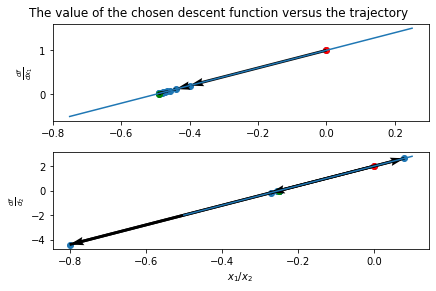

$x$:

array([[ 0.        ,  0.        ],
       [-0.4       , -0.8       ],
       [-0.44      ,  0.08      ],
       [-0.456     , -0.272     ],
       [-0.4648    , -0.2544    ],
       [-0.470432  , -0.251584  ],
       [-0.4743744 , -0.2507392 ],
       [-0.47730304, -0.25040128],
       [-0.47957274, -0.25024077],
       [-0.48138849, -0.25015516],
       [-0.48287741, -0.25010551],
       [-0.48412269, -0.25007482],
       [-0.48518118, -0.25005487],
       [-0.48609311, -0.25004136],
       [-0.48688779, -0.25003191],
       [-0.4875871 , -0.2500251 ],
       [-0.48820775, -0.25002008],
       [-0.48876268, -0.2500163 ],
       [-0.48926212, -0.2500134 ],
       [-0.48971424, -0.25001114]])

$f$:

array([[ 0.        ],
       [ 0.72      ],
       [-0.0608    ],
       [-0.496128  ],
       [-0.49868352],
       [-0.4991157 ],
       [-0.49934114],
       [-0.4994842 ],
       [-0.4995825 ],
       [-0.49965352],
       [-0.49970677],
       [-0.49974789],
       [-0.49978039],
       [-0.49980659],
       [-0.49982807],
       [-0.49984592],
       [-0.49986094],
       [-0.49987372],
       [-0.4998847 ],
       [-0.4998942 ]])

2. Pseudo-contraction

$||x_1(n) - x_1^*||$:

array([4.89714237e-01, 8.97142368e-02, 4.97142368e-02, 3.37142368e-02,
       2.49142368e-02, 1.92822368e-02, 1.53398368e-02, 1.24111968e-02,
       1.01415008e-02, 8.32574400e-03, 6.83682342e-03, 5.59154440e-03,
       4.53305722e-03, 3.62112981e-03, 2.82645021e-03, 2.12713216e-03,
       1.50648739e-03, 9.51557955e-04, 4.52121459e-04, 0.00000000e+00])

$||x_2(n) - x_2^*||$:

array([2.50011145e-01, 5.49988855e-01, 3.30011145e-01, 2.19888550e-02,
       4.38885504e-03, 1.57285504e-03, 7.28055039e-04, 3.90135039e-04,
       2.29623039e-04, 1.44016639e-04, 9.43649272e-05, 6.36711416e-05,
       4.37201810e-05, 3.02149153e-05, 2.07612293e-05, 1.39545754e-05,
       8.93466819e-06, 5.15497332e-06, 2.25720725e-06, 0.00000000e+00])

<Figure size 720x720 with 0 Axes>

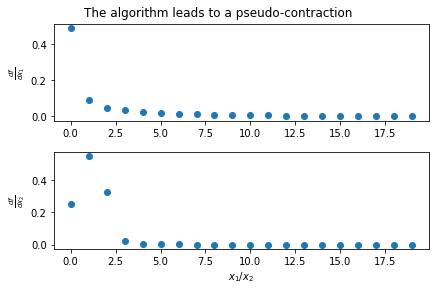

In [705]:
### Question 2.5
## Question 2.5.1
# Define my own gradient algorithm
# Define my own gradient algorithm
def gradient_descent(x0,obj_func,grad_func,iter_max,threshold,alpha,const_step):
#(initial value of x, object function, gradient of the objective, the maximum number of iterations,
# the stop threshold, alpha, 0 if step is constant)
    x = x0
    f_prev = obj_func(x) # previous value of objective function
    f_curr = f_prev # current value of objective function
    x_history = x # history of all x
    f_history = obj_func(x) # history of all f
    i = 0
    bias = 1e12

    while  i < iter_max and bias > threshold:
        x = x -(1/(i+1))**const_step*alpha*grad_func(x) # gradient descent
        f_curr = obj_func(x)

        # store the history of w and f
        x_history = np.vstack((x_history,x))
        f_history = np.vstack((f_history,obj_func(x)))

        # update iteration number and bias between successive values of objective function
        i+=1
        bias = np.absolute(f_curr-f_prev)
        f_prev = f_curr

    return x,obj_func(x),i,bias,x_history,f_history

# Define Q and r
Q = np.array([[1,0],[0,4]])
dQ = np.array([[2,0],[0,8]])
r = np.array([1,2])

# Define objective function
def f(x):
    return np.sum(np.dot(x,Q)*x + x*r)

def df(x):
    return np.dot(dQ,x) + r

def dfs(x):
    return 1*np.sign(df(x))

def dfdx(x):
    return 2*x + 1

def dfdy(x):
    return 8*x + 2

# Optimisation (Gradient descent)
display(Markdown(r"1. Gradient descent"))

x0 = np.array([0,0])
RES = gradient_descent(x0,f,df,1001,1.0e-5,0.4,1)
x_history = RES[4]
f_history = RES[5]
x1 = x_history[:,0]
x2 = x_history[:,1]
iter = x_history.shape[0]

# define x and y
x = np.linspace(-0.75, 0.25, 100)
y = np.linspace(-0.5, 0.1, 100)
fx = dfdx(x)
fy = dfdy(y)
y1 = dfdx(x1)
y2 = dfdy(x2)

# Plot the function
plt.figure(figsize=(10, 10))
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('The value of the chosen descent function versus the trajectory', fontsize=12)
ax1.plot(x, fx)
ax1.scatter(x1, y1, marker='o')
ax1.scatter(x1[0], y1[0], marker='o', c = "red")
ax1.scatter(x1[iter-1], y1[iter-1], marker='o', c = "green")
ax1.quiver(x1[:-1], y1[:-1], x1[1:]-x1[:-1], y1[1:]-y1[:-1], scale_units='xy', angles='xy', scale=1)
ax1.set(xlabel=" ", ylabel=r'$\frac{df}{dx_1}$')

ax2.plot(y, fy)
ax2.scatter(x2, y2, marker='o')
ax2.scatter(x2[0], y2[0], marker='o', c = "red")
ax2.scatter(x2[iter-1], y2[iter-1], marker='o', c = "green")
ax2.quiver(x2[:-1], y2[:-1], x2[1:]-x2[:-1], y2[1:]-y2[:-1], scale_units='xy', angles='xy', scale=1)
ax2.set(xlabel="$x_1 / x_2$ ", ylabel=r'$\frac{df}{d_2}$')

fig.tight_layout(pad=0.5, w_pad=0.5, h_pad=0)
#fig.subplots_adjust(top=0.8)

plt.show()

display(Markdown(r"$x$:"))
display(x_history)
display(Markdown(r"$f$:"))
display(f_history)

# Optimisation (Pseudo-contraction)
display(Markdown(r"2. Pseudo-contraction"))

# define x and y
n = np.linspace(0, iter-1, iter)
y1 = abs(x1 - x1[iter-1])
y2 = abs(x2 - x2[iter-1])

# Plot the function
plt.figure(figsize=(10, 10))
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('The algorithm leads to a pseudo-contraction', fontsize=12)
ax1.scatter(n, y1, marker='o')
ax1.set(xlabel=" ", ylabel=r'$\frac{df}{dx_1}$')

ax2.scatter(n, y2, marker='o')
ax2.set(xlabel="$x_1 / x_2$ ", ylabel=r'$\frac{df}{dx_2}$')

fig.tight_layout(pad=0.5, w_pad=0.5, h_pad=0)
#fig.subplots_adjust(top=0.8)

display(Markdown(r"$||x_1(n) - x_1^*||$:"))
display(y1)
display(Markdown(r"$||x_2(n) - x_2^*||$:"))
display(y2)

Let $Q = \begin{bmatrix}1 & 0\\
0 & 4
\end{bmatrix}$; $r^T = \begin{bmatrix}1 & 2 \end{bmatrix}$.<br/>
The problem is: $min_x$ $x^T\begin{bmatrix}1 & 0\\
0 & 4
\end{bmatrix}x + \begin{bmatrix}1 & 2 \end{bmatrix}x$.<br/>
Decision variable(s):  $x$<br/>
